<a href="https://colab.research.google.com/github/satyamanikanta7/Coursera-test/blob/main/Work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/kolkata_processed.csv")

In [3]:
df

,time,divergence,geopotential,humidity,temp,u-wind,v-wind,vorticity,virtual_temp,air_density,effective_wind
0,01-01-1990 12:00,-0.000010,1142.294800,0.006609,294.333435,-0.643896,-4.416409,-5.310000e-06,295.515570,1.194446,4.463101
1,02-01-1990 12:00,-0.000002,1229.721436,0.006922,294.204590,0.647480,-5.231328,-4.360000e-07,295.442171,1.194743,5.271244
2,03-01-1990 12:00,0.000021,1279.608643,0.006008,293.597626,2.056396,-5.434862,1.920000e-06,294.669581,1.197875,5.810894
3,04-01-1990 12:00,0.000022,1320.870972,0.006632,293.927154,2.035192,-4.494952,-3.450000e-06,295.111841,1.196080,4.934227
4,05-01-1990 12:00,0.000015,1413.385620,0.005735,294.194702,0.934394,-2.280605,-2.630000e-06,295.220128,1.195642,2.464600
...,...,...,...,...,...,...,...,...,...,...,...
12347,22-10-2023 12:00,-0.000030,1025.270874,0.013786,302.412445,-1.085786,-1.864665,1.370000e-05,304.946111,1.157508,2.157755
12348,23-10-2023 12:00,-0.000048,922.704468,0.017286,299.378021,-2.984499,-0.085307,-4.350000e-06,302.522956,1.166779,2.985718
12349,24-10-2023 12:00,0.000011,795.070190,0.016865,299.654724,-0.353055,-4.296375,7.110000e-06,302.725864,1.165997,4.310857
12350,25-10-2023 12:00,-0.000021,928.909302,0.016562,301.485870,0.812927,-2.089596,1.070000e-05,304.520241,1.159126,2.242156


In [4]:
df.isna().sum()

time              0
divergence        0
geopotential      0
humidity          0
temp              0
u-wind            0
v-wind            0
vorticity         0
virtual_temp      0
air_density       0
effective_wind    0
dtype: int64

In [5]:
data = df['effective_wind'].values

In [6]:
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

In [9]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length])
    return np.array(sequences), np.array(targets)

In [10]:
sequence_length = 365
train_size = int(0.8 * len(data))

In [11]:
X, y = create_sequences(data, sequence_length)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [12]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(70, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 365, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 365, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 365, 70)           33880     
                                                                 
 dropout_1 (Dropout)         (None, 365, 70)           0         
                                                                 
 lstm_2 (LSTM)               (None, 365, 80)           48320     
                                                                 
 dropout_2 (Dropout)         (None, 365, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
155/155 [==============================] - 271s 2s/step - loss: 0.0152 - val_loss: 0.0135
Epoch 2/20
155/155 [==============================] - 252s 2s/step - loss: 0.0123 - val_loss: 0.0126
Epoch 3/20
155/155 [==============================] - 254s 2s/step - loss: 0.0120 - val_loss: 0.0126
Epoch 4/20
155/155 [==============================] - 254s 2s/step - loss: 0.0117 - val_loss: 0.0125
Epoch 5/20
155/155 [==============================] - 253s 2s/step - loss: 0.0116 - val_loss: 0.0127
Epoch 6/20
155/155 [==============================] - 253s 2s/step - loss: 0.0114 - val_loss: 0.0125
Epoch 7/20
155/155 [==============================] - 253s 2s/step - loss: 0.0112 - val_loss: 0.0130
Epoch 8/20
155/155 [==============================] - 253s 2s/step - loss: 0.0111 - val_loss: 0.0124
Epoch 9/20
155/155 [==============================] - 253s 2s/step - loss: 0.0110 - val_loss: 0.0123
Epoch 10/20
155/155 [==============================] - 253s 2s/step - loss: 0.0110 - val_lo

In [15]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

66/66 [==============================] - 18s 276ms/step


In [16]:
test_predict

array([[0.2788924 ],
       [0.27317154],
       [0.31081367],
       ...,
       [0.20799312],
       [0.23666044],
       [0.22463126]], dtype=float32)

In [17]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [18]:
test_rmse = np.sqrt(mean_squared_error(df['effective_wind'].values[train_size+sequence_length:], test_predict))
test_rmse

1.258782057316927

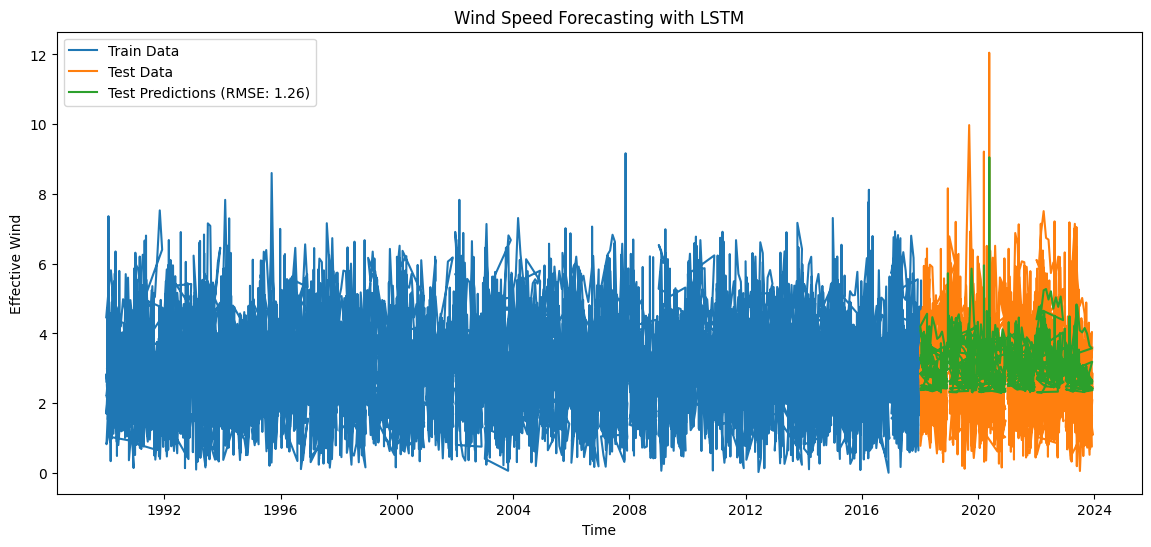

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(df.index[:train_size+sequence_length], df['effective_wind'][:train_size+sequence_length], label='Train Data')
plt.plot(df.index[train_size+sequence_length:], df['effective_wind'][train_size+sequence_length:], label='Test Data')
plt.plot(df.index[train_size+sequence_length:], test_predict, label=f'Test Predictions (RMSE: {test_rmse:.2f})')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Effective Wind')
plt.title('Wind Speed Forecasting with LSTM')
plt.show()

**Future Predictions**

In [20]:
future_sequence = data[-sequence_length:]
future_predictions = []

In [21]:
for _ in range(90):
    next_step = model.predict(future_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(next_step[0, 0])
    future_sequence = np.append(future_sequence[1:], next_step, axis=0)

1/1 [==============================] - 0s 158ms/step


In [22]:
import pandas as pd
from datetime import datetime, timedelta

In [23]:
# Define the start date (one day after the last date in your original dataset)
start_date = df.index[-1] + timedelta(days=1)

# Define the end date (90 days from the start date)
end_date = start_date + timedelta(days=89)

# Generate the date range
date_range = pd.date_range(start=start_date, end=end_date)

In [24]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [25]:
# Flatten the two-dimensional future_predictions array
future_predictions_flat = future_predictions.flatten()

# Create the "future" DataFrame
future = pd.DataFrame({'Date': date_range, 'Predicted Wind Speed': future_predictions_flat})


<ipython-input-26-0a9327960380>:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(end=end_date, periods=90, closed='right'), future_predictions, label='Future Predictions')


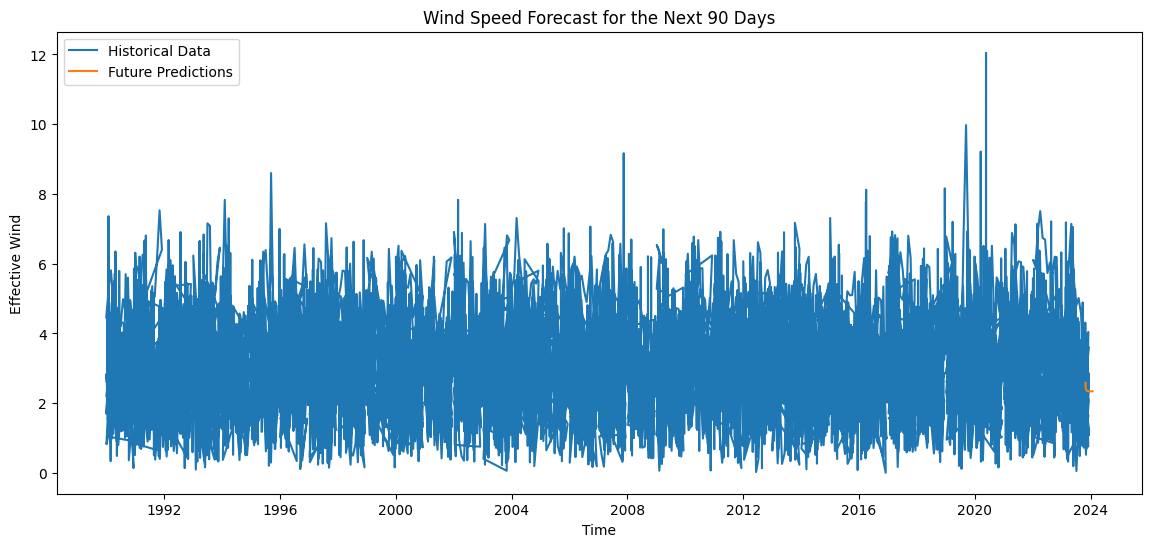

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['effective_wind'], label='Historical Data')
plt.plot(pd.date_range(end=end_date, periods=90, closed='right'), future_predictions, label='Future Predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Effective Wind')
plt.title('Wind Speed Forecast for the Next 90 Days')
plt.show()

In [27]:
future

,Date,Predicted Wind Speed
0,2023-10-27 12:00:00,2.587045
1,2023-10-28 12:00:00,2.502285
2,2023-10-29 12:00:00,2.453819
3,2023-10-30 12:00:00,2.427463
4,2023-10-31 12:00:00,2.413441
...,...,...
85,2024-01-20 12:00:00,2.341729
86,2024-01-21 12:00:00,2.341729
87,2024-01-22 12:00:00,2.341728
88,2024-01-23 12:00:00,2.341728


In [28]:
model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
!pip install joblib

In [30]:
from joblib import dump

dump(scaler, 'scaler.joblib')

['scaler.joblib']